### 감귤 착과량 예측 AI 경진대회

https://dacon.io/competitions/official/236038/overview/description


- ID : 과수나무 고유 ID

- 착과량(int) : 실제 감귤 착과량 (Target)

- 나무 생육 상태 Features (5개): 수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균) (데이터 기입은 cm 단위)

- 새순 Features (89개): 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터

- 엽록소 Features (89개): 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터



- 목적: 감귤나무의 나무 생육 상태, 엽록소 및 새순 정보로부터 감귤 착과량을 회귀 예측


- 시간이 경과할 수록 새순 피처의 변화, 엽록소 피처의 변화를 따로 봐야할 것 같음


- 감귤 착과량에 가장 영향을 많이 주는 피처를 찾기/나무 생육 상태 5가지에 따른 착과량 비교하기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (54.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and dir

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

#### 간단 EDA

In [13]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [14]:
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [15]:
test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


In [17]:
train.isna().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

In [18]:
test.isna().sum()

ID                0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
수관폭평균             0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 183, dtype: int64

In [19]:
train.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


In [20]:
growth = train[['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균']]
growth

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균
0,692,275.0,287.0,292.0,289.5
1,534,293.0,284.0,336.0,310.0
2,634,300.0,392.0,450.0,421.0
3,639,289.0,368.0,379.0,373.5
4,496,306.0,353.0,358.0,355.5
...,...,...,...,...,...
2202,119,230.0,353.0,367.0,360.0
2203,611,266.0,337.0,400.0,368.5
2204,650,237.0,353.0,362.0,357.5
2205,363,281.0,337.0,403.0,370.0


In [21]:
growth.corr()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균
착과량(int),1.000000,0.007002,0.021279,0.037168,0.030611
수고(m),0.007002,1.000000,0.456394,0.484295,0.490456
수관폭1(min),0.021279,0.456394,1.000000,0.841330,0.957948
수관폭2(max),0.037168,0.484295,0.841330,1.000000,0.961049
수관폭평균,0.030611,0.490456,0.957948,0.961049,1.000000


<Axes: >

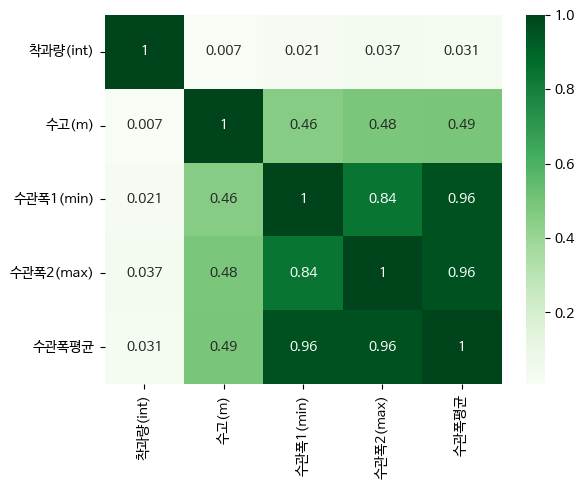

In [22]:
sns.heatmap(growth.corr(), cmap='Greens', annot=True)

- 나무 생육 상태 4가지와 착과량은 상관성이 없음

In [23]:
saesun = train.loc[:, '2022-09-01 새순':'2022-11-28 새순']
saesun

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [24]:
saesun.mean()

2022-09-01 새순    3.774807
2022-09-02 새순    3.736928
2022-09-03 새순    3.701495
2022-09-04 새순    3.663435
2022-09-05 새순    3.627503
                   ...   
2022-11-24 새순    0.682102
2022-11-25 새순    0.632170
2022-11-26 새순    0.559991
2022-11-27 새순    0.454599
2022-11-28 새순    0.352832
Length: 89, dtype: float64

- 시간이 지날수록 새순 개수가 줄어듬

In [25]:
yeoprokso = train.loc[:, '2022-09-01 엽록소':'2022-11-28 엽록소']
yeoprokso

,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,77.572477,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,80.116691,79.974397,79.890399,79.709278,79.531061,79.348139,79.151023,79.128739,79.084197,78.924476,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,79.118529,78.941452,78.928197,78.741878,78.713691,78.654247,78.461743,78.323264,78.219696,78.123820,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,77.936262,77.839523,77.815607,77.644644,77.546555,77.480441,77.383665,77.282036,77.126354,77.121300,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,76.233231,76.186572,76.031032,75.886553,75.736449,75.735036,75.642223,75.458496,75.380945,75.272054,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,74.024614,73.876933,73.853205,73.721799,73.666974,73.540144,73.449933,73.349051,73.310852,73.273704,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,81.920876,81.898801,81.769536,81.607251,81.456723,81.408951,81.312932,81.181893,81.027196,81.010124,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,75.486518,75.451905,75.315223,75.252547,75.186170,75.099348,75.093451,75.050447,74.877088,74.711044,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,74.110017,74.017373,73.886675,73.720486,73.712709,73.532512,73.352104,73.230786,73.183439,73.006241,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [26]:
yeoprokso.mean()

2022-09-01 엽록소    76.899788
2022-09-02 엽록소    76.801492
2022-09-03 엽록소    76.699545
2022-09-04 엽록소    76.599512
2022-09-05 엽록소    76.500475
                    ...    
2022-11-24 엽록소    68.493569
2022-11-25 엽록소    68.393050
2022-11-26 엽록소    68.291350
2022-11-27 엽록소    68.192009
2022-11-28 엽록소    68.093096
Length: 89, dtype: float64

- 시간이 지날수록 엽록소도 줄어들지만, 급격한 변화는 아님

여기서부터 https://dacon.io/competitions/official/236038/codeshare/7298?page=1&dtype=recent 참고

#### 전처리

- NMAE(Normalized Mean Absolute Error): 시계열 데이터일 때 많이 이용하는 평가산식

  정규화된 MAE이기 때문에 편향되지 않아 scale이 다른 데이터셋의 MAE 비교에 용이함

  - MAE(Mean Absolute Error): 예측값과 실제값간의 차이에 절댓값을 취하고 이를 평균 낸 지표. 값이 작을수록 잘 예측한 것

NMAE 평가를 위한 코드

In [27]:
def NMAE(true, pred):
  mae = np.mean(np.abs(true-pred))
  score = mae / np.mean(np.abs(true))
  return score

파생변수 생성

period_i_새순 : 9일의 새순 평균 컬럼

새순 diff : 새순 max 컬럼 - 새순 min 컬럼

새순 max 컬럼

새순 min 컬럼

나무 부피 컬럼 : 수고(m) x 수관폭평균

엽록소 컬럼의 경우 target 값과의 연관성이 부족하다 생각해 all drop

In [28]:
def reduce_col(df, trainortest):
  saesun = train.loc[:, '2022-09-01 새순':'2022-11-28 새순']
  yeoprokso = train.loc[:, '2022-09-01 엽록소':'2022-11-28 엽록소']

  sarr = np.array(saesun.columns)
  sarr = np.append(sarr, 'd').reshape(10, 9)  #새순데이터가 89개이므로 1개를 임의로 추가해서 90개 맞춰준 후 reshape하기
  sdate_dic = {'period_1 새순':sarr[0],
               'period_2 새순':sarr[1],
               'period_3 새순':sarr[2],
               'period_4 새순':sarr[3],
               'period_5 새순':sarr[4],
               'period_6 새순':sarr[5],
               'period_7 새순':sarr[6],
               'period_8 새순':sarr[7],
               'period_9 새순':sarr[8],
               'period_10 새순':sarr[9][:-1]
               }

  new = pd.DataFrame()
  for period, dates in sdate_dic.items():
    new[period] = saesun[dates].mean(axis=1)

  new['새순 diff'] = train['2022-09-01 새순']-df['2022-11-28 새순']
  new['새순 max'] = train['2022-09-01 새순']
  new['새순 min'] = train['2022-11-28 새순']

  if trainortest == 'train':
    new['착과량'] = train['착과량(int)']

  new['나무부피'] = train['수고(m)'] * train['수관폭평균']

  return new

데이터셋의 앞서 생성한 함수 적용하고 X, y에 간추린 피처들만 할당

In [29]:
X = reduce_col(train, 'train').drop('착과량', axis=1)
y = reduce_col(train, 'train')['착과량']

In [30]:
X.columns

Index(['period_1 새순', 'period_2 새순', 'period_3 새순', 'period_4 새순',
       'period_5 새순', 'period_6 새순', 'period_7 새순', 'period_8 새순',
       'period_9 새순', 'period_10 새순', '새순 diff', '새순 max', '새순 min', '나무부피'],
      dtype='object')

#### 모델링(1) RandomForestRegressor

그리드서치

In [32]:
from sklearn.model_selection import ShuffleSplit
#임의분할 교차검정, 사전에 설정한 비율에 따라 데이터셋 인덱스를 무작위로  분할
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
import time

start = time.time()

rf = RandomForestRegressor(n_jobs = -1, random_state=0)
param_grid = {'max_depth':[3, 4, 5, 6, 7,],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}

ss = ShuffleSplit(test_size=0.3, random_state=0)
grid_rf_cv = GridSearchCV(rf, return_train_score=True,
                          param_grid=param_grid,
                          cv=ss,
                          verbose=0, scoring='neg_mean_absolute_error',
                          n_jobs=-1)
grid_rf_cv.fit(X, y)

end = time.time()
print('수행 시간: {0:.3f}'.format(end-start))
print('최적 매개변수 조합:', grid_rf_cv.best_params_)
print('최고의 교차 검증 점수:', grid_rf_cv.best_score_)

수행 시간: 1542.643
최적 매개변수 조합: {'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'sqrt'}
최고의 교차 검증 점수: -30.18017600138905


최적 모델을 best_rf에 저장하고 NMAE 확인

In [33]:
best_rf = grid_rf_cv.best_estimator_
y_pred_rf = best_rf.predict(X)
print(f'NMAE: {NMAE(y, y_pred_rf)}')

NMAE: 0.06610512938333356


test data로 예측하기

In [34]:
X_test = reduce_col(test, 'test')
test_pred_rf = best_rf.predict(X_test)

In [35]:
test_pred_rf

array([645.19767757, 551.3456464 , 639.02808225, ..., 639.0451265 ,
       360.25043723,  24.2362344 ])

#### 모델링(2) XGBoostRegressor

In [36]:
import xgboost as xgb

그리드서치

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

xgbr = xgb.XGBRegressor()
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2],
              'max_depth': [3 ,4 ,5, 6, 7]}

ss = ShuffleSplit(test_size=0.3, random_state=0)
grid_xgb_cv = GridSearchCV(xgbr, return_train_score=True,
                          param_grid=param_grid,
                          cv=ss,
                          verbose=0, scoring='neg_mean_absolute_error',
                          n_jobs=-1)
grid_xgb_cv.fit(X, y)

print('최적 매개변수 조합:', grid_xgb_cv.best_params_)
print('최고의 교차 검증 점수:', grid_xgb_cv.best_score_)

최적 매개변수 조합: {'learning_rate': 0.1, 'max_depth': 3}
최고의 교차 검증 점수: -30.630914427899672


최적 모델을 best_xgb에 저장하고 NMAE 확인

In [38]:
best_xgb = grid_xgb_cv.best_estimator_
y_pred_xgb = best_xgb.predict(X)
print(f'NMAE: {NMAE(y, y_pred_xgb)}')

NMAE: 0.06664120790058173


test data로 예측하기

In [40]:
test_pred_xgb = best_xgb.predict(X_test)

#### 모델 앙상블

In [41]:
final_pred = 0.5 * test_pred_rf + 0.5 * test_pred_xgb

In [48]:
final_pred

array([644.03145597, 548.1806357 , 636.13910216, ..., 631.92289284,
       360.16364025,  26.20572459])

#### 교차 검증 및 변수 중요도 확인

랜덤포레스트 교차검증

In [49]:
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(rf, X, y,
                           cv=5, return_train_score=True,
                           n_jobs=-1)

cv_scores_2 = cross_validate(best_rf, X, y,
                             cv=5, return_train_score=True,
                             n_jobs=-1)

print('첫 번째 교차 검증 결과')
print('훈련 세트 점수: {0:.3f}'.format(np.mean(cv_scores['train_score'])))
print('검증 세트 점수: {0:.3f}'.format(np.mean(cv_scores['test_score'])))
print('\n')
print('두 번째 교차 검증 결과')
print('훈련 세트 점수: {0:.3f}'.format(np.mean(cv_scores_2['train_score'])))
print('검증 세트 점수: {0:.3f}'.format(np.mean(cv_scores_2['test_score'])))

첫 번째 교차 검증 결과
훈련 세트 점수: 0.995
검증 세트 점수: 0.967


두 번째 교차 검증 결과
훈련 세트 점수: 0.979
검증 세트 점수: 0.970


XGBoost 교차검증

In [50]:
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(xgbr, X, y,
                           cv=5, return_train_score=True,
                           n_jobs=-1)

cv_scores_2 = cross_validate(best_xgb, X, y,
                             cv=5, return_train_score=True,
                             n_jobs=-1)

print('첫 번째 교차 검증 결과')
print('훈련 세트 점수: {0:.3f}'.format(np.mean(cv_scores['train_score'])))
print('검증 세트 점수: {0:.3f}'.format(np.mean(cv_scores['test_score'])))
print('\n')
print('두 번째 교차 검증 결과')
print('훈련 세트 점수: {0:.3f}'.format(np.mean(cv_scores_2['train_score'])))
print('검증 세트 점수: {0:.3f}'.format(np.mean(cv_scores_2['test_score'])))

첫 번째 교차 검증 결과
훈련 세트 점수: 0.998
검증 세트 점수: 0.963


두 번째 교차 검증 결과
훈련 세트 점수: 0.978
검증 세트 점수: 0.970


랜덤포레스트 피처 중요도

In [51]:
importances = best_rf.feature_importances_

features = X.columns

new = pd.DataFrame({'피처': np.array(features), '중요도': importances})

new.sort_values(by='중요도', ascending=False)

,피처,중요도
1,period_2 새순,0.206323
2,period_3 새순,0.203110
0,period_1 새순,0.155636
11,새순 max,0.147918
3,period_4 새순,0.094341
4,period_5 새순,0.062433
10,새순 diff,0.045945
6,period_7 새순,0.034997
5,period_6 새순,0.031448
7,period_8 새순,0.009795


XGBoost 피처 중요도

In [52]:
importances = best_xgb.feature_importances_

features = X.columns

new = pd.DataFrame({'피처': np.array(features), '중요도': importances})

new.sort_values(by='중요도', ascending=False)

,피처,중요도
0,period_1 새순,0.558243
1,period_2 새순,0.244044
11,새순 max,0.082362
2,period_3 새순,0.047165
10,새순 diff,0.043126
3,period_4 새순,0.010819
12,새순 min,0.007358
4,period_5 새순,0.002545
6,period_7 새순,0.000885
9,period_10 새순,0.000765
